Uber raw data from:

https://github.com/fivethirtyeight/uber-tlc-foil-response/blob/master/uber-trip-data/uber-raw-data-apr14.csv


Video:

https://www.youtube.com/watch?v=Q73ADVZCqSU

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("uber-raw-data-apr14.csv")

In [4]:
df.head(2)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512


In [5]:
df["Base"].value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [7]:
# Convert Date/Time to a pandas datetime object

df["Date/Time"] = pd.to_datetime(df["Date/Time"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [9]:
df.head(2)

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512


## Add some useful time columns

In [10]:
# add Day of Month (dom)

def get_dom(dt):
    return dt.day

df["dom"] = df["Date/Time"].map(get_dom)

In [11]:
# add Day of Week (dow)

def get_dow(dt):
    return dt.day_of_week

df['dow'] = df['Date/Time'].map(get_dow)

In [12]:
# add Hour

def get_hour(dt):
    return dt.hour

df['Hour'] = df['Date/Time'].map(get_hour)

In [13]:
df.tail(10)

,Date/Time,Lat,Lon,Base,dom,dow,Hour
564506,2014-04-30 23:00:00,40.7316,-73.9891,B02764,30,2,23
564507,2014-04-30 23:04:00,40.7267,-73.9937,B02764,30,2,23
564508,2014-04-30 23:05:00,40.7788,-73.9600,B02764,30,2,23
564509,2014-04-30 23:15:00,40.7420,-74.0037,B02764,30,2,23
564510,2014-04-30 23:18:00,40.7514,-74.0066,B02764,30,2,23
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


## Analysis

### Analyze Day of Month 'dom'

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

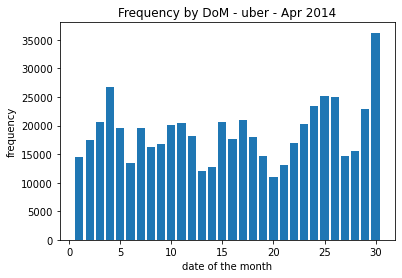

In [14]:
plt.hist(df.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by DoM - uber - Apr 2014')

In [15]:
for k, rows in df.groupby('dom'):
    print(k, len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [16]:
by_date = df.value_counts('dom')

In [17]:
by_date

dom
30    36251
4     26714
25    25095
26    24925
24    23352
29    22835
17    20973
3     20701
15    20641
11    20420
23    20346
10    20041
7     19550
5     19521
12    18170
18    18074
16    17717
2     17474
22    16975
9     16843
8     16188
28    15475
27    14677
19    14602
1     14546
6     13445
21    13162
14    12674
13    12112
20    11017
dtype: int64

In [18]:
def count_rows(rows):
    return len(rows)
by_date1 = df.groupby('dom').apply(count_rows)
by_date1

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [19]:
print(type(by_date))
print(type(by_date1))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


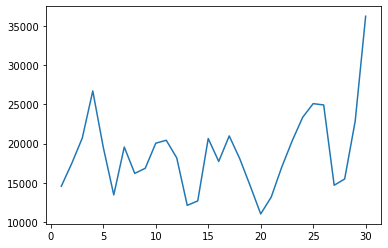

In [20]:
plt.plot(by_date1)

Text(0.5, 1.0, 'Tried for graph of sorted descending by date... oops')

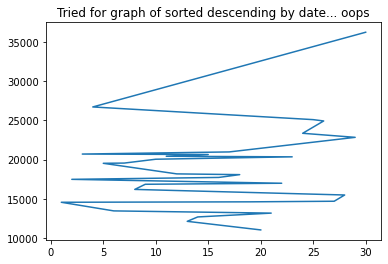

In [21]:
plt.plot(by_date)
plt.title("Tried for graph of sorted descending by date... oops")

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

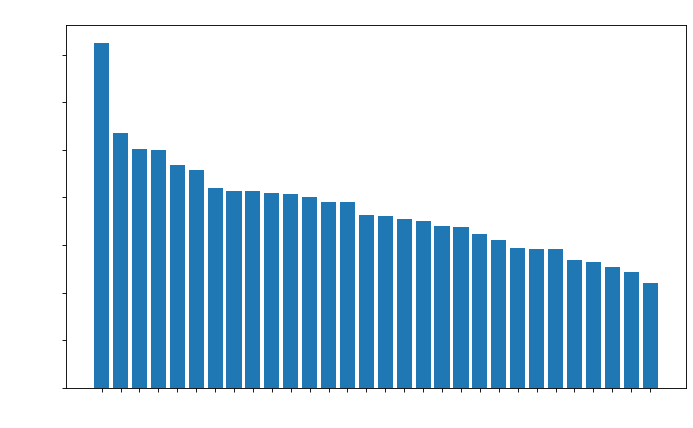

In [22]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
plt.bar(range(1,31), by_date)
plt.xticks(range(1,31), by_date.index, color='white');
plt.xlabel('date of the month', color='white')
plt.yticks(color = 'white')
plt.ylabel('frequency', color='white')
plt.title('Frequency by DoM - uber - Apr 2014', color='white')

## Analysis by Hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

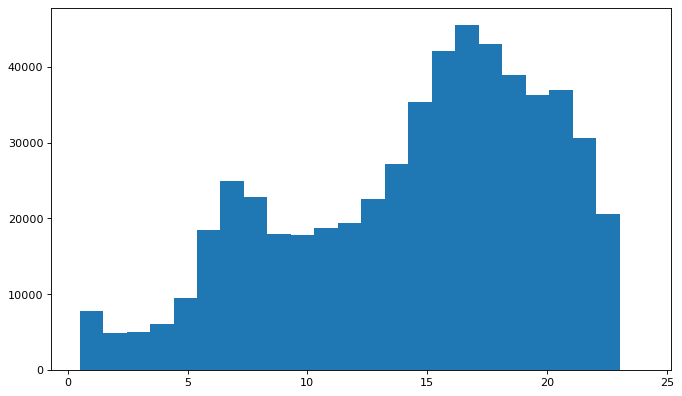

In [23]:
figure(figsize=(10, 6), dpi=80)
plt.hist(df.Hour, bins = 24, range=(.5,24))


## Analyze by weekday

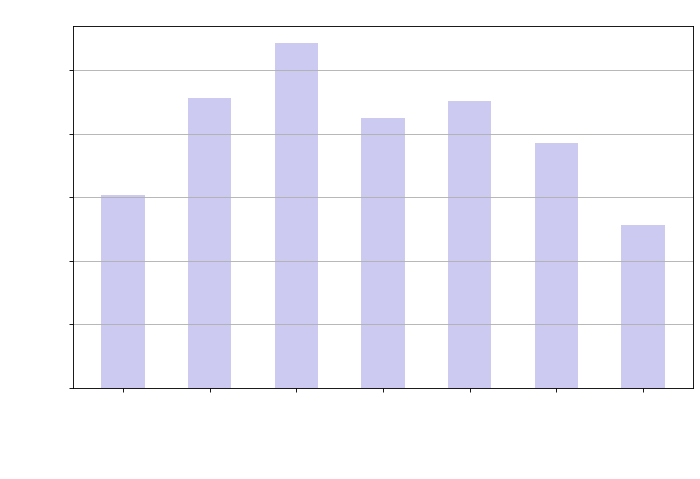

In [24]:
figure(figsize=(10, 6), dpi=80)
plt.hist(df.dow, bins=7, range=(-0.5, 6.5), rwidth=0.5, color='#837bdf', alpha=.4);
#ax.set_xticklabels(['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

plt.grid(visible=True, axis='y')
plt.xticks(range(7), 'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split(), color='white', rotation=60);
plt.xlabel('day of week', color='white')
plt.yticks(color = 'white')
plt.ylabel('quantity of rides', color='white')
plt.title('Total rides', color='white');

## Cross Analysis (hour, dow)

In [25]:
df.groupby(['Hour', 'dow']).apply(count_rows)

Hour  dow
0     0       518
      1       765
      2       899
      3       792
      4      1367
             ... 
23    2      2571
      3      2909
      4      5393
      5      5719
      6      1018
Length: 168, dtype: int64

In [26]:
df.value_counts(['Hour', 'dow'], sort=False)

Hour  dow
0     0       518
      1       765
      2       899
      3       792
      4      1367
             ... 
23    2      2571
      3      2909
      4      5393
      5      5719
      6      1018
Length: 168, dtype: int64

In [27]:
by_hour_dow = df.value_counts('dow Hour'.split(), sort=False).unstack()
by_hour_dow

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dow,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


Text(0.5, 1.0, 'Hour x Day of Week Heatmap')

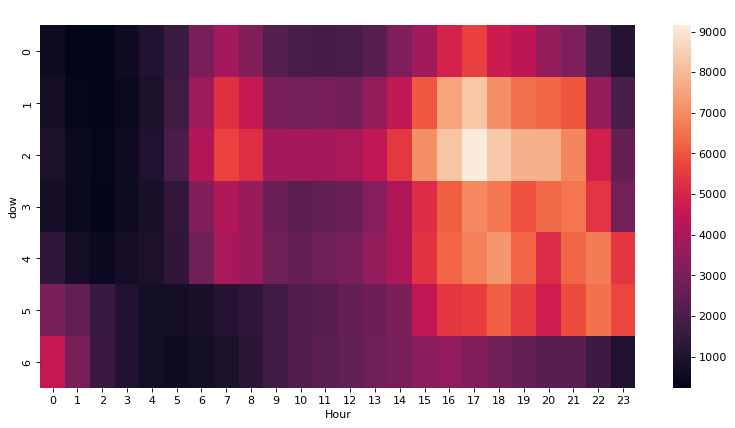

In [28]:
figure(figsize=(12, 6), dpi=80)
sns.heatmap(by_hour_dow)
plt.title('Hour x Day of Week Heatmap', color='white')

## By lat and long

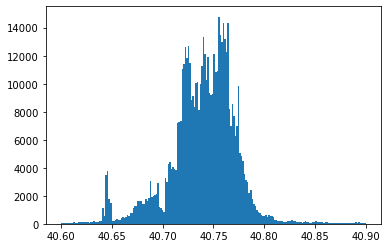

In [29]:
plt.hist(df.Lat, bins=200, range=(40.6,40.9));

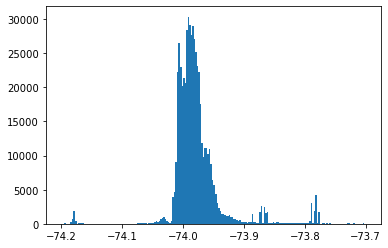

In [30]:
plt.hist(df.Lon, bins=200, range=(-74.2, -73.7));

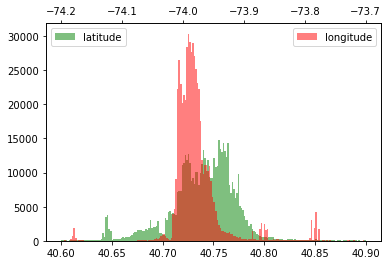

In [31]:
plt.hist(df.Lat, bins=200, range=(40.6,40.9), color = 'g', alpha = .5, label = 'latitude');
plt.legend(loc = 'upper left');
plt.twiny()
plt.hist(df.Lon, bins=200, range=(-74.2, -73.7), color = 'r', alpha = .5, label = 'longitude');
plt.legend();

Text(0.5, 1.0, 'Uber Rides in New York, April 2014')

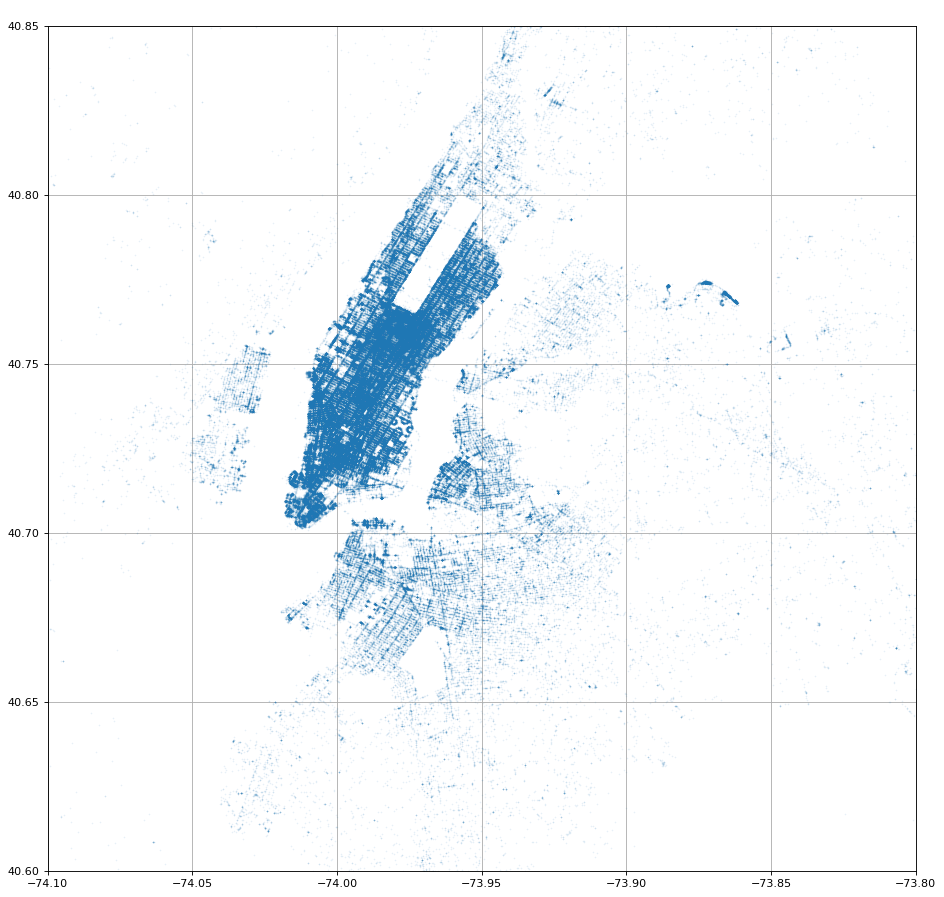

In [74]:
figure(figsize=(14,14), dpi=80)

plt.plot(df['Lon'], df['Lat'], '.', ms=0.1)
plt.xlim(-74.1, -73.8)
plt.ylim(40.6,40.85)
plt.grid(visible=True)
plt.title('Uber Rides in New York, April 2014', color='white')